# CNN Digit Recognizer 

### Project Prerequisites

In [24]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [25]:
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
	tf.config.experimental.set_memory_growth(gpu,True)

for gpu in gpus:
	print(gpu)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


### Loading the Data

In [26]:
df = pd.read_csv("Data/train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


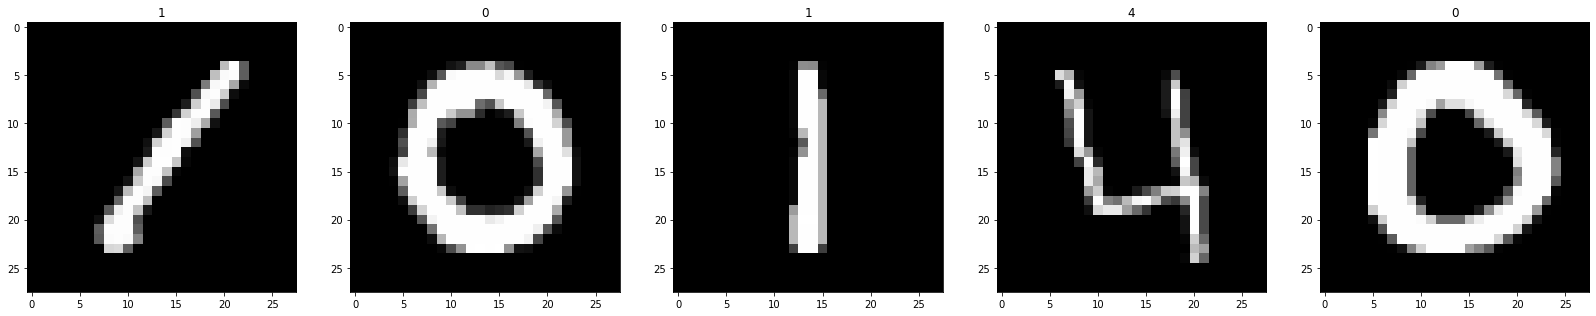

In [27]:
fig,ax = plt.subplots(ncols=5,figsize = (28,28))

for i in range(5):
    labels = df.iloc[i,0]
    img = df.iloc[i,1:].values.reshape(28,28)
    ax[i].imshow(img,cmap = "gray")
    ax[i].title.set_text(labels)

### Preprocessing

In [34]:
X = df.iloc[:,1:].values
y = df.iloc[:,0]

In [36]:
X_normalized = X/255.0

X_train,X_test,y_train,y_test = train_test_split(X_normalized,y,test_size=0.2)

X_train.shape,X_test.shape

((33600, 784), (8400, 784))

In [38]:
mms = MinMaxScaler()
scaled_X_train = mms.fit_transform(X_train)
scales_X_test = mms.transform(X_test)